Library install 

In [56]:
!pip install ucimlrepo
!pip install -U scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\briyani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\briyani\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Necessary library

In [63]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix

Importing Dataset

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets


In [4]:
df=pd.concat([X,y],axis=1)

Checking missing values

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [27]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [40]:
df.shape

(649, 33)

In [30]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Plot Graphs

<Axes: xlabel='sex', ylabel='count'>

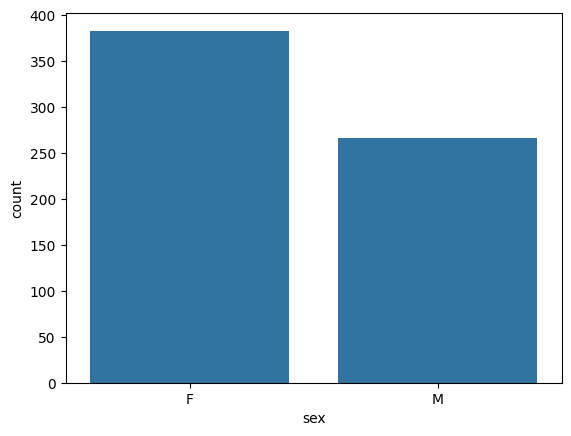

In [11]:
sns.countplot(x="sex",data=df)

<Axes: xlabel='age', ylabel='count'>

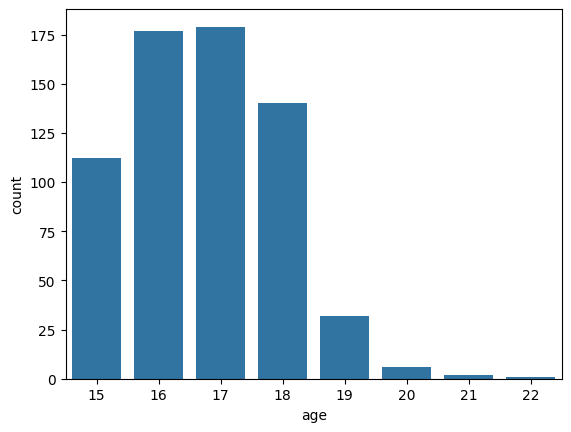

In [12]:
sns.countplot(x="age",data=df)

In [32]:
print(df.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [34]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [62]:
df["G3"].mean()

11.906009244992296

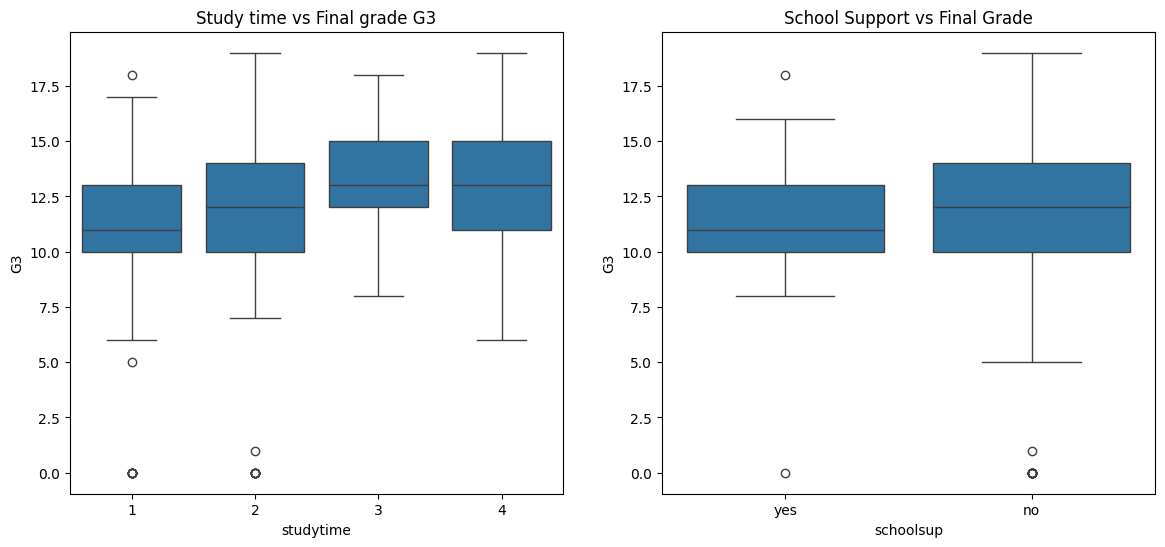

In [35]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x="studytime",y="G3",data=df,ax=axes[0])
axes[0].set_title("Study time vs Final grade G3")

sns.boxplot(x='schoolsup', y='G3', data=df,ax=axes[1])
axes[1].set_title("School Support vs Final Grade")
plt.tight_layout
plt.show()

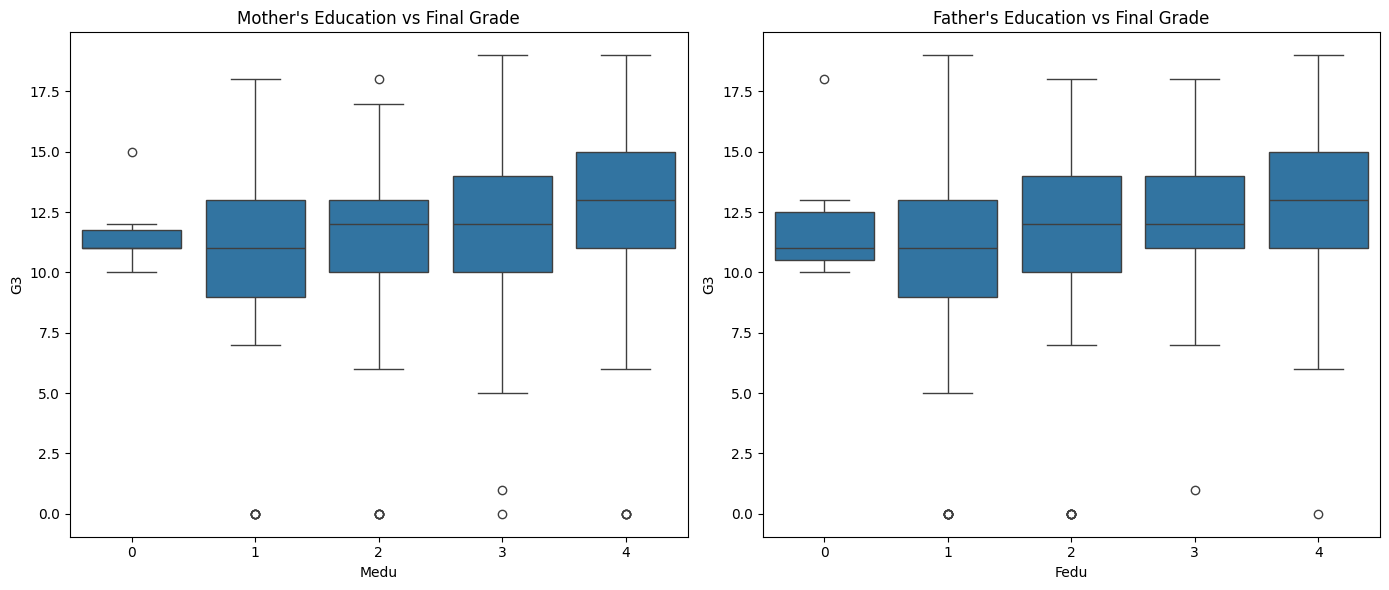

In [36]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x='Medu', y='G3', data=df,ax=axes[0])
axes[0].set_title("Mother's Education vs Final Grade")
sns.boxplot(x='Fedu', y='G3', data=df,ax=axes[1])
axes[1].set_title("Father's Education vs Final Grade")
plt.tight_layout()
plt.show()

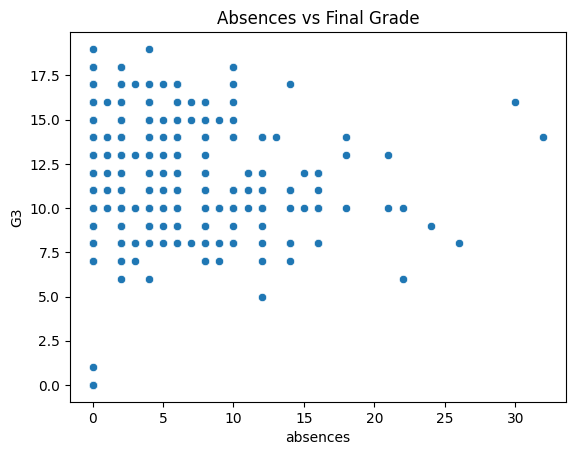

In [37]:
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade")
plt.show()

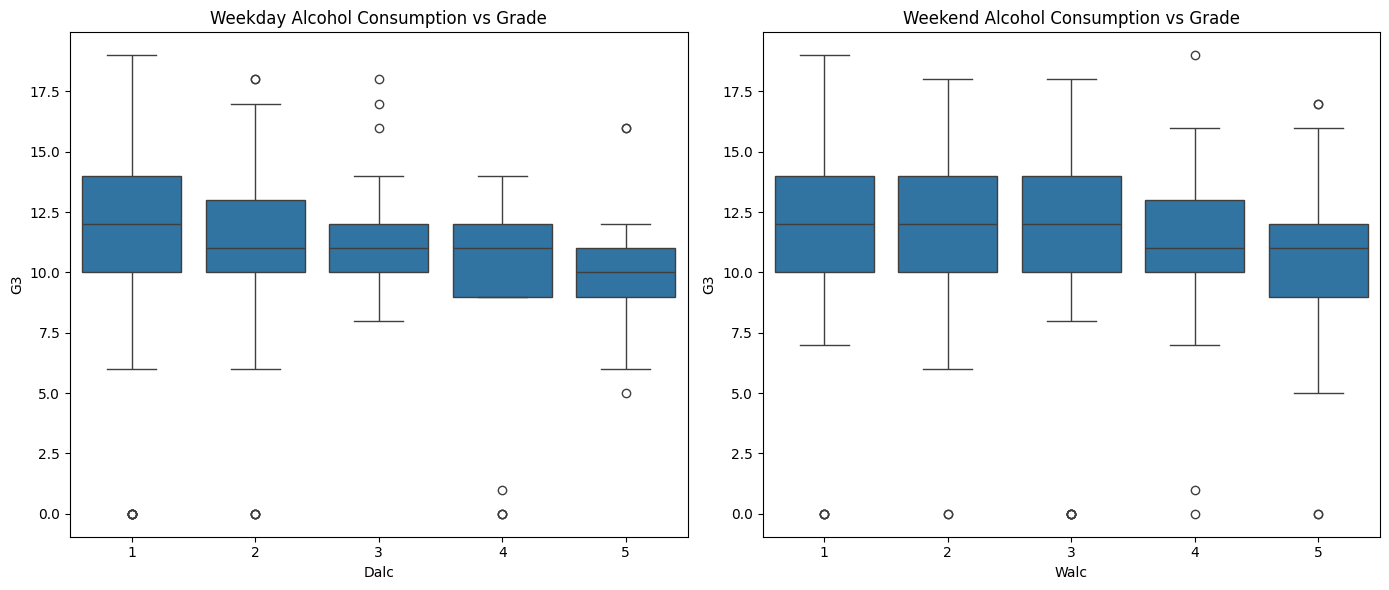

In [39]:
fig , axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x='Dalc', y='G3', data=df,ax=axes[0])
axes[0].set_title("Weekday Alcohol Consumption vs Grade")
sns.boxplot(x='Walc', y='G3', data=df,ax=axes[1])
axes[1].set_title("Weekend Alcohol Consumption vs Grade")
plt.tight_layout()
plt.show()

In [ ]:
#simple binary conversion
df_numeric = df.copy()
df_numeric = df_numeric.replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1}) 

C:\Users\briyani\AppData\Local\Temp\ipykernel_29784\1818426320.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df_numeric.replace({'yes': 1, 'no': 0, 'F': 0, 'M': 1})


In [25]:
# drop non-numeric columns (optional)
df_numeric = df_numeric.select_dtypes(include='number')

# correlation
corr = df_numeric.corr()

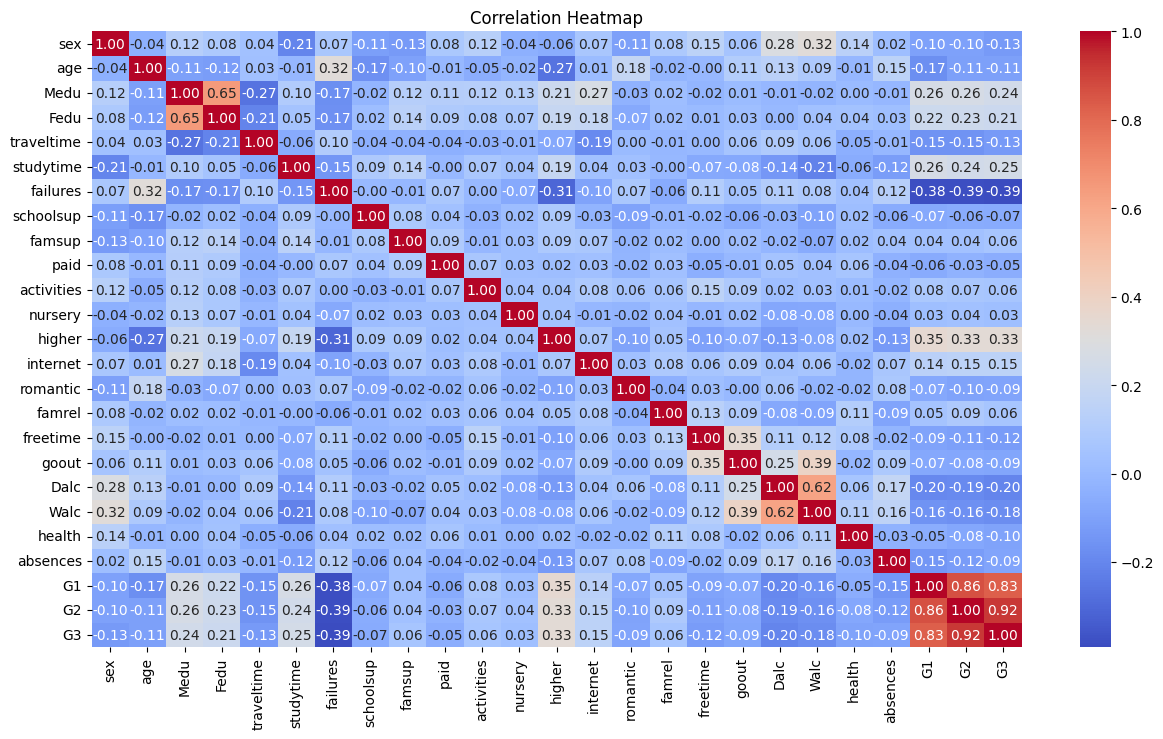

In [26]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True,cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Heatmap")
plt.show()

Random Forset Regression

In [51]:
df_model=df_numeric.copy()
X=df_model.drop("G3",axis=1)
y=df_model["G3"]

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 1.5796115384615383
R^2 Score: 0.838017068760467


LogisticRegression

In [64]:
model_X= LogisticRegression(max_iter=1000)
model_X.fit(X_train, y_train)


C:\Users\briyani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
y_pred=model_X.predict(X_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  4,  6,  4,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  2, 11,  6,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  3,  2,  7,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  7,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  4,  3,  2,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  3,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  5,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  4,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0]],
      dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           7       0.00      0.00      0.00         1
           8       0.62      0.71      0.67         7
           9       0.17      0.20      0.18         5
          10       0.43      0.35      0.39        17
          11       0.58      0.44      0.50        25
          12       0.17      0.12      0.14        16
          13       0.35      0.54      0.42        13
          14       0.21      0.25      0.23        12
          15       0.43      0.30      0.35        10
          16       0.38      0.56      0.45         9
          17       0.20      0.40      0.27         5
          18       0.33      0.14      0.20         7
          19       0.00      0.00      0.00         1

    accuracy                           0.36       130
   macro avg       0.29      0.32      0.30       130
weighted avg       0.37      0.36      0.36       130



C:\Users\briyani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\briyani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\briyani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics